# TensorFlow Beginner Tutorial
In this tutorial, you'll learn how to use TensorFlow, a powerful deep learning library that provides both flexibility and performance. We'll cover the basics of building, training, and evaluating neural networks using TensorFlow and Keras (a high-level API in TensorFlow). By the end, you'll have a practical understanding of how to implement deep learning models.

## Introduction to TensorFlow
### What is TensorFlow?
At its core, TensorFlow is a comprehensive library for numerical computation using data flow graphs. It enables the creation of computational graphs where nodes represent mathematical operations and edges represent multi-dimensional data arrays (tensors) that flow between them. This structure makes TensorFlow particularly powerful for deep learning and neural network-based tasks, as it efficiently handles large-scale computation across CPUs, GPUs, and even TPUs.

Key features of TensorFlow include:

* Tensors: The primary data structure (multi-dimensional arrays) used in the computational graph.
* Automatic Differentiation: TensorFlow computes gradients automatically for backpropagation.
* Eager Execution: Allows immediate execution of operations, making debugging easier.
* Versatile APIs: TensorFlow offers both high-level APIs (like Keras) for quick prototyping and lower-level APIs for advanced customizations.

## Installation of TensorFlow
To get started with TensorFlow, you'll need to install it via pip. You can install it with the following command:
```bash
pip install tensorflow
```
If you have a GPU available and you want to use it, you can install the GPU version:
```bash
pip install tensorflow-gpu
```
Check the installation:



In [1]:
import tensorflow as tf

print("TensorFlow Version:", tf.__version__)


TensorFlow Version: 2.16.1


## Basics of Tensors
Tensors are the fundamental data structures in TensorFlow. They represent the multidimensional arrays used in deep learning models.

In [2]:
import tensorflow as tf

# Create a 1D tensor
tensor_1d = tf.constant([1, 2, 3, 4])
print(tensor_1d)

# Create a 2D tensor (matrix)
tensor_2d = tf.constant([[1, 2], [3, 4]])
print(tensor_2d)

# Convert NumPy array to tensor
import numpy as np
array = np.array([[5, 6], [7, 8]])
tensor = tf.convert_to_tensor(array)
print(tensor)


tf.Tensor([1 2 3 4], shape=(4,), dtype=int32)
tf.Tensor(
[[1 2]
 [3 4]], shape=(2, 2), dtype=int32)
tf.Tensor(
[[5 6]
 [7 8]], shape=(2, 2), dtype=int64)


TensorFlow also supports various operations on tensors such as addition, multiplication, reshaping, and more.

In [3]:
# Element-wise addition
a = tf.constant([1, 2, 3])
b = tf.constant([4, 5, 6])
print(tf.add(a, b))

# Matrix multiplication
matrix1 = tf.constant([[1, 2], [3, 4]])
matrix2 = tf.constant([[5, 6], [7, 8]])
result = tf.matmul(matrix1, matrix2)
print(result)


tf.Tensor([5 7 9], shape=(3,), dtype=int32)
tf.Tensor(
[[19 22]
 [43 50]], shape=(2, 2), dtype=int32)


## Building Neural Networks with Keras (TensorFlow's High-Level API)
TensorFlow provides Keras, a user-friendly API for building neural networks. We will start by building a simple fully connected feed-forward neural network.

### Step-by-step guide:
* Define the Model Architecture: Keras models are either sequential or functional. We will use the Sequential API to stack layers.

In [4]:
from tensorflow.keras import layers, models

# Define a simple Sequential model
model = models.Sequential()

# Add layers to the model
model.add(layers.Dense(128, activation='relu', input_shape=(784,)))  # Input layer
model.add(layers.Dense(64, activation='relu'))  # Hidden layer
model.add(layers.Dense(10, activation='softmax'))  # Output layer (10 classes)


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


* Compile the Model: After defining the model, we need to compile it with a loss function, optimizer, and metrics to monitor during training.

In [5]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


* Train the Model: Train the model on a dataset (such as MNIST).

In [6]:
# Load the MNIST dataset (handwritten digits)
mnist = tf.keras.datasets.mnist

# Split into training and test data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocess the data by normalizing the pixel values
x_train = x_train.reshape(-1, 784).astype('float32') / 255.0
x_test = x_test.reshape(-1, 784).astype('float32') / 255.0

# Train the model
model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.1)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10


I0000 00:00:1728565274.242875      98 service.cc:145] XLA service 0x7e3798003300 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1728565274.242914      98 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1728565274.242918      98 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


 106/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.5633 - loss: 1.4324

I0000 00:00:1728565275.816084      98 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8667 - loss: 0.4483 - val_accuracy: 0.9663 - val_loss: 0.1147
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9663 - loss: 0.1083 - val_accuracy: 0.9722 - val_loss: 0.0960
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9759 - loss: 0.0773 - val_accuracy: 0.9757 - val_loss: 0.0837
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9818 - loss: 0.0562 - val_accuracy: 0.9745 - val_loss: 0.0845
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9872 - loss: 0.0412 - val_accuracy: 0.9752 - val_loss: 0.0879
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9887 - loss: 0.0346 - val_accuracy: 0.9797 - val_loss: 0.0756
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9909 - loss: 0.0277 - val_accuracy: 0.9788 - val_loss: 0.0849
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9924 - loss: 0.0220 - val_accurac

* Evaluate the Model: After training, evaluate the model on the test dataset.

In [7]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc:.4f}')


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9738 - loss: 0.1135
Test accuracy: 0.9767


## Autograd and Gradient Tape
Like PyTorch's autograd, TensorFlow allows automatic differentiation via tf.GradientTape, which records operations to compute gradients.

In [8]:
# Example of using tf.GradientTape for automatic differentiation
x = tf.Variable(3.0)

with tf.GradientTape() as tape:
    y = x ** 2

# Compute gradient of y with respect to x
grad = tape.gradient(y, x)
print(grad)  # Output: 6.0


tf.Tensor(6.0, shape=(), dtype=float32)


## Activation Functions in TensorFlow
TensorFlow includes several common activation functions used in neural networks.

In [9]:
import tensorflow.keras.backend as K

x = tf.constant([-1.0, 2.0, 3.0])

# ReLU activation
relu_output = K.relu(x)
print("ReLU:", relu_output)

# Sigmoid activation
sigmoid_output = K.sigmoid(x)
print("Sigmoid:", sigmoid_output)



ReLU: tf.Tensor([0. 2. 3.], shape=(3,), dtype=float32)
Sigmoid: tf.Tensor([0.26894143 0.8807971  0.95257413], shape=(3,), dtype=float32)


## Optimizers in TensorFlow
TensorFlow includes various optimization algorithms for training deep learning models. Some common optimizers include:

* SGD (Stochastic Gradient Descent)
* Adam (Adaptive Moment Estimation)
* RMSProp

Here's an example of defining different optimizers:

In [10]:
optimizer_sgd = tf.keras.optimizers.SGD(learning_rate=0.01)
optimizer_adam = tf.keras.optimizers.Adam(learning_rate=0.001)
optimizer_rmsprop = tf.keras.optimizers.RMSprop(learning_rate=0.001)


In practice, Adam is one of the most commonly used optimizers due to its adaptive learning rate properties.

## Loss Functions
TensorFlow provides several loss functions depending on the task. Some common ones include:

* Mean Squared Error (MSE): For regression problems
* Categorical Crossentropy: For multi-class classification problems
* Binary Crossentropy: For binary classification problems

Example usage:

In [11]:
loss_fn = tf.keras.losses.CategoricalCrossentropy()


## End-to-End Example: Fashion MNIST Image Classification with CNNs in TensorFlow
### Step 1: Importing Libraries
First, let's import the necessary libraries. We'll use TensorFlow and Keras for building the model and NumPy for data manipulation.

In [12]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np


### Step 2: Loading and Understanding the Fashion MNIST Dataset
We'll load the dataset using TensorFlow's built-in utility. Fashion MNIST is divided into a training set of 60,000 images and a test set of 10,000 images. Each image is 28x28 pixels, and each pixel has a grayscale value between 0 and 255.

In [13]:
# Load the Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = datasets.fashion_mnist.load_data()

# Print the shape of the dataset
print(f'Training data shape: {x_train.shape}')  # (60000, 28, 28)
print(f'Test data shape: {x_test.shape}')  # (10000, 28, 28)


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)


* Visualizing the Data

Let's take a look at some sample images to better understand the dataset.

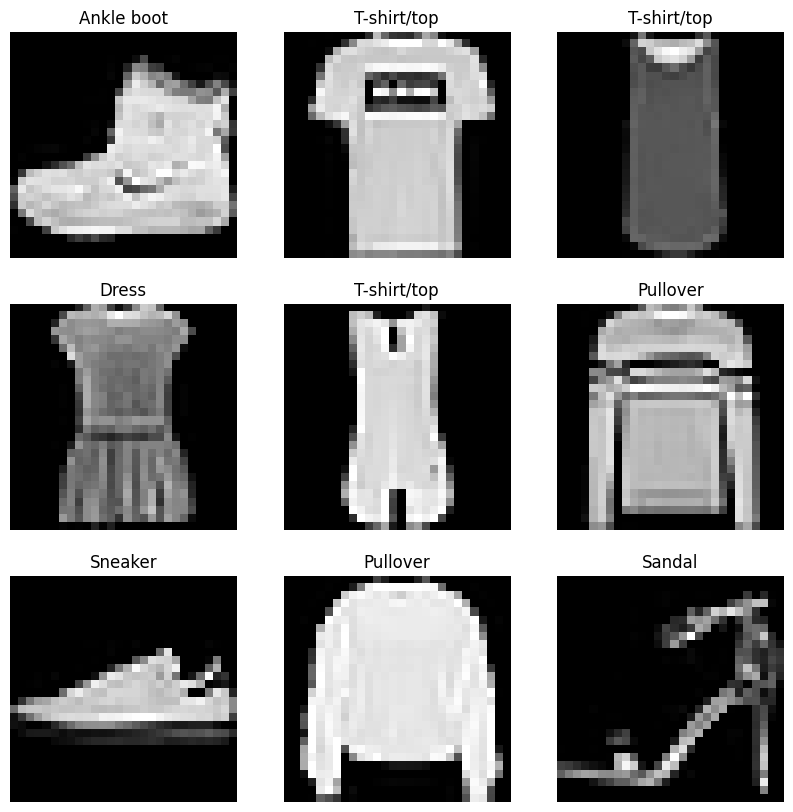

In [14]:
# Plot some sample images from the training dataset
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(class_names[y_train[i]])
    plt.axis('off')
plt.show()


### Step 3: Preprocessing the Data
Before feeding the data into the neural network, we need to preprocess it. This involves:

* Normalizing the data: We divide the pixel values by 255 to scale them between 0 and 1, which helps speed up convergence during training.
* Reshaping the data: Since the images are 28x28 and grayscale, we'll need to reshape them to fit into a 4D tensor for input into the CNN.

In [15]:
# Normalize pixel values to be between 0 and 1
x_train = x_train / 255.0
x_test = x_test / 255.0

# Reshape the images to add the channel dimension (28, 28, 1)
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)


### Step 4: Building the CNN Model
We'll build a Convolutional Neural Network (CNN) for image classification. The CNN will consist of:

* Convolutional Layers: For feature extraction (e.g., detecting edges, textures).
* MaxPooling Layers: To downsample and reduce the computational load.
* Flatten Layer: To convert the 2D output to 1D before passing it to the Dense layers.
* Dense Layers: For classification.

In [16]:
# Define the CNN model
model = models.Sequential()

# Add convolutional layers, with ReLU activation and max pooling
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Flatten the output from the convolutional layers
model.add(layers.Flatten())

# Add a fully connected layer with 64 neurons
model.add(layers.Dense(64, activation='relu'))

# Output layer with 10 neurons (for 10 classes) and softmax activation
model.add(layers.Dense(10, activation='softmax'))

# Summary of the model
model.summary()


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

#### Explanation of Model Layers:
* Conv2D Layers: These layers apply convolutional filters to the image to extract different features such as edges and patterns.
* MaxPooling2D: These layers downsample the output of the convolutional layers, reducing the spatial dimensions.
* Flatten: The output of the final convolutional layer is flattened into a 1D vector.
* Dense Layer: A fully connected layer that helps in learning more complex patterns from the features.
* Output Layer: A softmax layer that produces probabilities for each of the 10 classes.

### Compiling the Model
Before training, we need to compile the model. This involves specifying the:

Loss function: We'll use sparse_categorical_crossentropy since we are dealing with a multi-class classification problem.
Optimizer: We'll use the Adam optimizer, which is known for its fast convergence.
Metrics: We'll track accuracy to see how well our model is performing.

In [17]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


### Training the Model
Now that the model is compiled, we can train it using the training data. We'll train it for 10 epochs with a batch size of 64, and use the test set for validation during training.

In [18]:
# Train the model
history = model.fit(x_train, y_train, epochs=10, 
                    validation_data=(x_test, y_test), batch_size=64)


Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7203 - loss: 0.7882 - val_accuracy: 0.8647 - val_loss: 0.3799
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8707 - loss: 0.3538 - val_accuracy: 0.8847 - val_loss: 0.3229
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8903 - loss: 0.3000 - val_accuracy: 0.8834 - val_loss: 0.3202
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9006 - loss: 0.2700 - val_accuracy: 0.8975 - val_loss: 0.2879
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9071 - loss: 0.2473 - val_accuracy: 0.8983 - val_loss: 0.2843
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9185 - loss: 0.2195 - val_accuracy: 0.8916 - val_loss: 0.3008
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9267 - loss: 0.1993 - val_accuracy: 0.9091 - val_loss: 0.2585
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9311 - loss: 0.1827 - val_accuracy: 0.

#### Explanation:
Epochs: The number of times the model will go through the entire dataset.
Batch size: The number of samples the model sees at each step of training.
Validation data: We'll use the test data to evaluate the model during training.

### Evaluating the Model
After training, we can evaluate the model on the test dataset to see how well it generalizes to unseen data.

In [19]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'Test accuracy: {test_acc:.4f}')


313/313 - 1s - 2ms/step - accuracy: 0.9112 - loss: 0.2615
Test accuracy: 0.9112


* Test accuracy: This shows how accurate the model is on the test data.

### Visualizing the Training Process
We can plot the training and validation accuracy and loss over time to see how the model's performance improves during training.

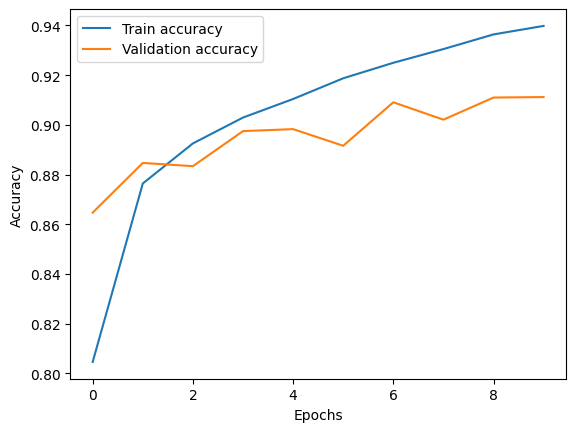

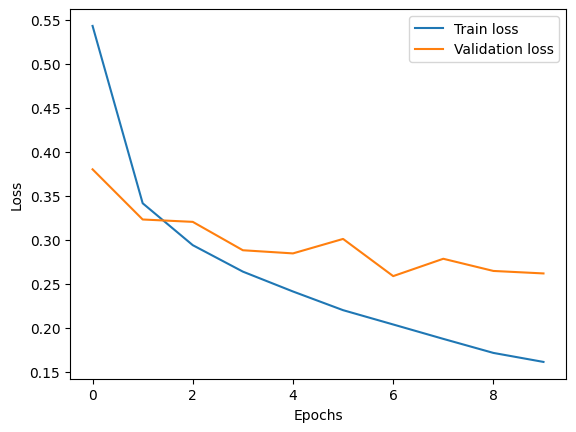

In [20]:
# Plot the training and validation accuracy over time
plt.plot(history.history['accuracy'], label='Train accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot the training and validation loss over time
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


This helps in understanding whether the model is overfitting (doing well on training but poorly on validation) or underfitting (performing poorly on both).

### Making Predictions
Now, let's make predictions on the test set and visualize some of the results.

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


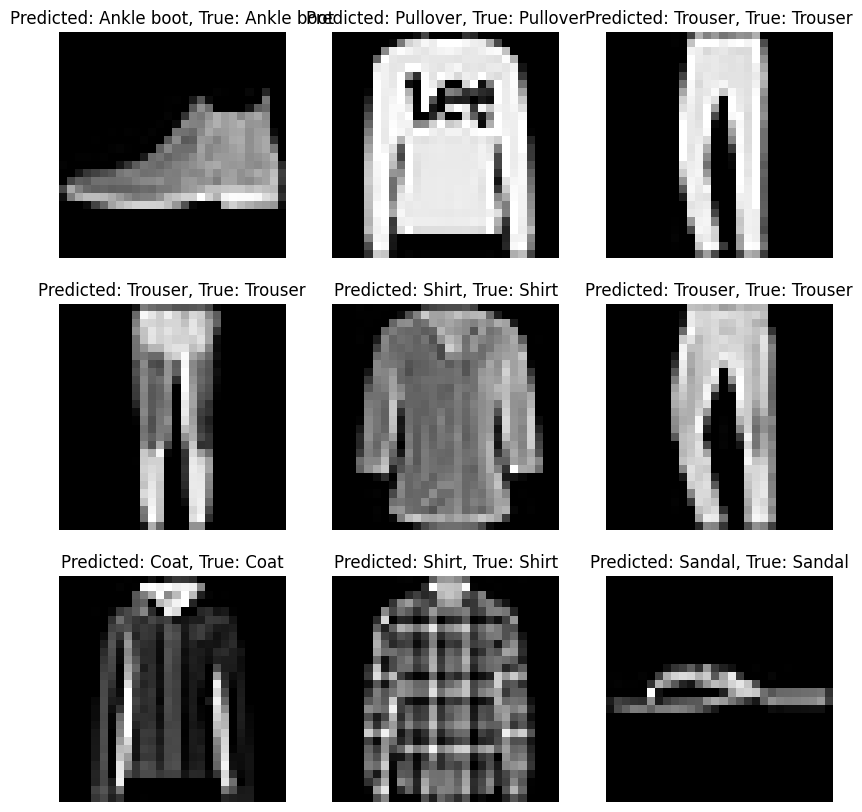

In [21]:
# Make predictions
predictions = model.predict(x_test)

# Show some test images along with predicted and true labels
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    
    # Assuming y_test is a 1D array, access it directly without indexing further
    plt.title(f'Predicted: {class_names[np.argmax(predictions[i])]}, True: {class_names[y_test[i]]}')
    
    plt.axis('off')
plt.show()


### Improving the Model
To improve the model's accuracy, you can apply the following techniques:

* Data Augmentation: Increase the dataset's diversity by applying random transformations like rotation, flipping, etc.
* Batch Normalization: Normalize activations within the network to improve convergence speed and performance.
* Deeper Network: Add more layers to make the model deeper, allowing it to learn more complex features.

### Summary
In this tutorial, we built a convolutional neural network (CNN) in TensorFlow to classify images from the Fashion MNIST dataset. We covered loading the dataset, preprocessing, building the model, training, evaluation, and visualization. You can further improve the model's accuracy by using data augmentation, regularization, or building a deeper network.